
Presented by:
* Caso Agata;
* Cavallo Marco;
* Ponzo Sara;
* Matteo Toschi.





###***EMPIRICAL CUMULATIVE DISTRIBUTION FUNCTION***

 The Empirical Cumulative Distribution Function (ECDF) it's a function it provides an estimate of the cumulative distribution of a random variable, that it does not follow any distribution, from a sample of observed data and thanks to the Glivenko-Cantelli theorem it's possible to state that it converges for $n → ∞$ with probability 1 to the sample distribution.

 ECDF'S Formula:


$$F_n(x) = \frac{1}{n} \sum_{i=1}^n \mathbf{1}_{\{x_i \leq x\}}$$



$n$= sample size

$\mathbf{1}_{\{x_i \leq x\}}$ = indicator function \\





   


This one, instead, is the simplest and intiuitive formula:


$$F_n(x) = \frac{\text{number of observation} \leq x}{n}$$

Before starting to analyze the characteristics of the ECDF, we must do a differentiation between the Empirical CDF and the Parametric CDF.

The 2 CDF have the same *goal* : to estimate the probability that an asset will have a value $S \leq x$.

But, differently from the Empirical CDF, the Parametric CDF follows a given distribution as Normal, Student t, Exponential etc.

For this reason, it depends on a parameter ( like mean and variance). If we are considering the Normal distribution; the formula to find the function in this case will be:

$$F(x) = \int_{-\infty}^{x} \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(t-\mu)^2}{2\sigma^2}} dt$$




And this type of CDF is useful for several reasons:


*   Suitable when you have a good a priori knowledge of the theoretical distribution of the data.
*   Allows interpolation and extrapolation. This can be very useful for the financial data and also for evaluating the prices of the intermediate values (the Black and Scoles model is an example).

The main limit of the Parametric CDF is that if the wrong distribution is set, all the following results are pointless.

# Property of the ECDF:

*   The ECDF is a **increasing function** ; this means that if the value of $X$ increase, also the $F(x)$ increase.
*   The ECDF is **no parametric**; this means that it does not follow a given priori distribution (as Student t or Normal) but it's build only from the data.
*   The ECDF is defined in the **Interval [0;1]**; this means that it's equal to $0$ for its smallest value and equal to $1$ when $X$ is equal to $∞$.
*   The ECDF has **discrete jumps** corresponding to a given values $x$, the jump is equal to $\frac{1}{n}$.


## Advantages:


* Being a no-parametric function, we don't need to do assumption on the
 distribution;

* It is easy to crate and to understand;
* It perfectly reflects the structure of the observed data;
* It is more powerful for the estimation of the probability of extreme events (in the range of the obtained data) thanks to the analysis of the heavy tails. In fact, it is used for stress tests and to estimate the Vlaue at risk $(VaR)$
* It can be used as a proof. Using the $QQ-plot$ it's possible to compare the ECDF with a known parametric distribution;
* It can be used on more differents financial instruments as asset, returns, spread etc.


# Limits:


*   The ECDF is not a good way to analize and to evaluete predictive models or inferences because as it does not provide distribution parameters like mean and variance.

*   With small samples, the ECDF can produce inaccurate results;
*   Being a non- continous function it doesn't allow interpolation and extrapolation;






In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
import pylab as py
import scipy.stats as stats

In [ ]:
ticker = 'AAPL'
start_date = '2024-01-01'
end_date = '2024-06-01'
data_AAPL= yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
ticker = 'JUVE.MI'
start_date = '2024-01-01'
end_date = '2024-06-01'
data_JUVE = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data_AAPL['Returns'] = data_AAPL['Adj Close'].pct_change()
returns_AAPL = data_AAPL['Returns'].dropna()

In [ ]:
data_JUVE['Returns'] = data_JUVE['Adj Close'].pct_change()
returns_JUVE = data_JUVE['Returns'].dropna()

In [ ]:
sorted_returns_AAPL = np.sort(returns_AAPL)
ecdf_AAPL = np.arange(1, len(sorted_returns_AAPL) + 1) / len(sorted_returns_AAPL)

In [ ]:
sorted_returns_JUVE = np.sort(returns_JUVE)
ecdf_JUVE = np.arange(1, len(sorted_returns_JUVE) + 1) / len(sorted_returns_JUVE)

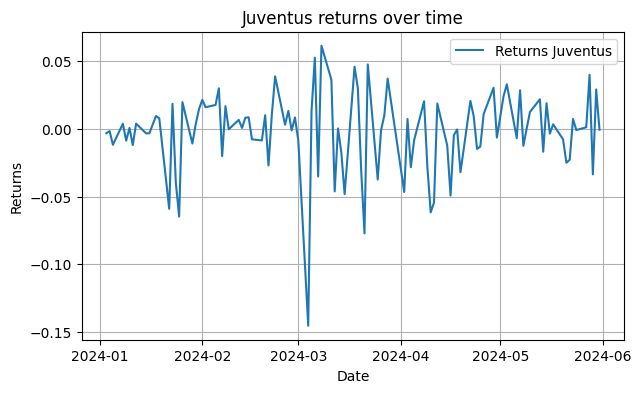

In [ ]:

plt.figure(figsize=(7, 4))
plt.plot(returns_JUVE.index, returns_JUVE, label='Returns Juventus')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Juventus returns over time')
plt.legend()
plt.grid(True)
plt.show()

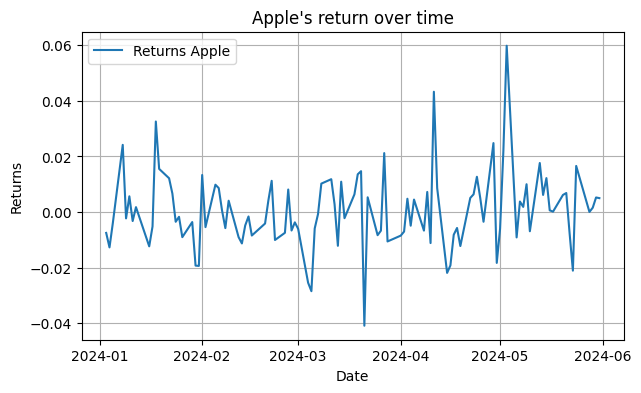

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(returns_AAPL.index, returns_AAPL, label='Returns Apple')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Apple\'s return over time')
plt.legend()
plt.grid(True)
plt.show()

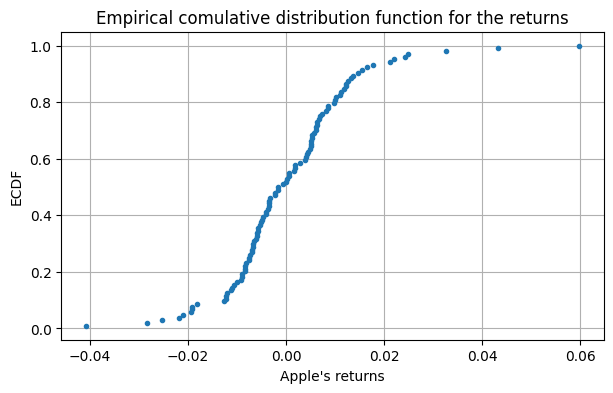

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(sorted_returns_AAPL, ecdf_AAPL, marker='.', linestyle='none')
plt.title('Empirical comulative distribution function for the returns')
plt.xlabel('Apple\'s returns')
plt.ylabel('ECDF')
plt.grid()
plt.show()

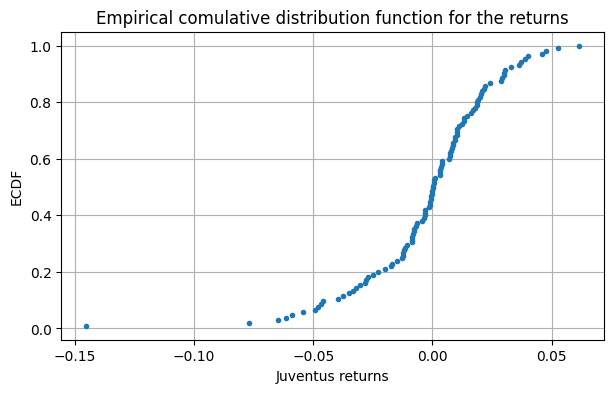

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(sorted_returns_JUVE, ecdf_JUVE, marker='.', linestyle='none')
plt.title('Empirical comulative distribution function for the returns')
plt.xlabel('Juventus returns')
plt.ylabel('ECDF')
plt.grid()
plt.show()

However, it's possible to build the ECDF of a certain set of data directly using the function ECDF form the satsmodels package:


In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

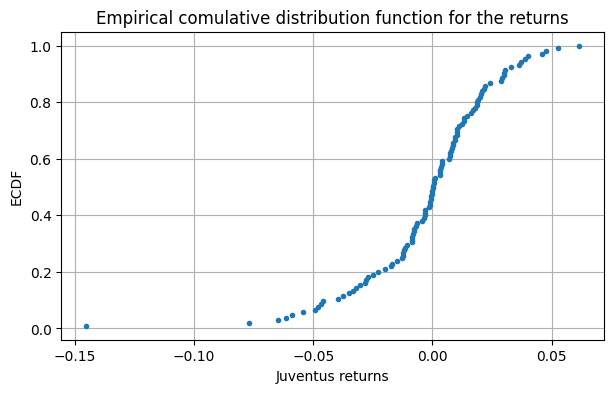

In [ ]:
Juve_ecdf = ECDF(returns_JUVE)
plt.figure(figsize=(7, 4))
plt.plot(Juve_ecdf.x, Juve_ecdf.y, marker='.', linestyle='none')
plt.title('Empirical comulative distribution function for the returns')
plt.xlabel('Juventus returns')
plt.ylabel('ECDF')
plt.grid()
plt.show()

# QQ-plot and quantiles


To better understand our results and to be able to interpret them, it’s useful for us trying to plot them in a QQ-plot.

This kind of plot is very used in statistics because it allows us to compare a distribution with another theorical distribution we can chose.

In this way we are able to compare the quintiles of our distribution on the y asses and the quantiles of the theorical distribution on the x asses.

Quantiles are values that divide an ordered set of data into equal intervals, each containing the same number of observations. They are used to describe the distribution of data and to identify key points of their variability.

Empirical quantiles are calculated by ordering the data and determining values corresponding to specific cumulative probabilities, for this reason the formula depends on the definition chosen for cumulative probabilities, but the most common approach uses:

$$p_i = \frac{i - 0.5}{n}, \quad i = 1, 2, \dots, n$$
where $i$  represents the position of the ordered data.

On the other hand, theoretical quantiles depend on the theoretical reference distribution. In general, the theoretical quantiles are obtained from the inverse function of the cumulative distribution, also called percent-point function.

$$q_i = F^{-1}(p_i)$$





With financial data, particularly in the assets returns analysis , the normal distribution and the Student's t-distribution are often used for a comparison with the empirical CDF.

In fact, despite most of the models assuming a normal distributions of returns, real-world financial returns exhibit characteristics that may deviate from the normal distribution's assumptions, such as fat tails and skewness, that are better described by a Student t distribution.


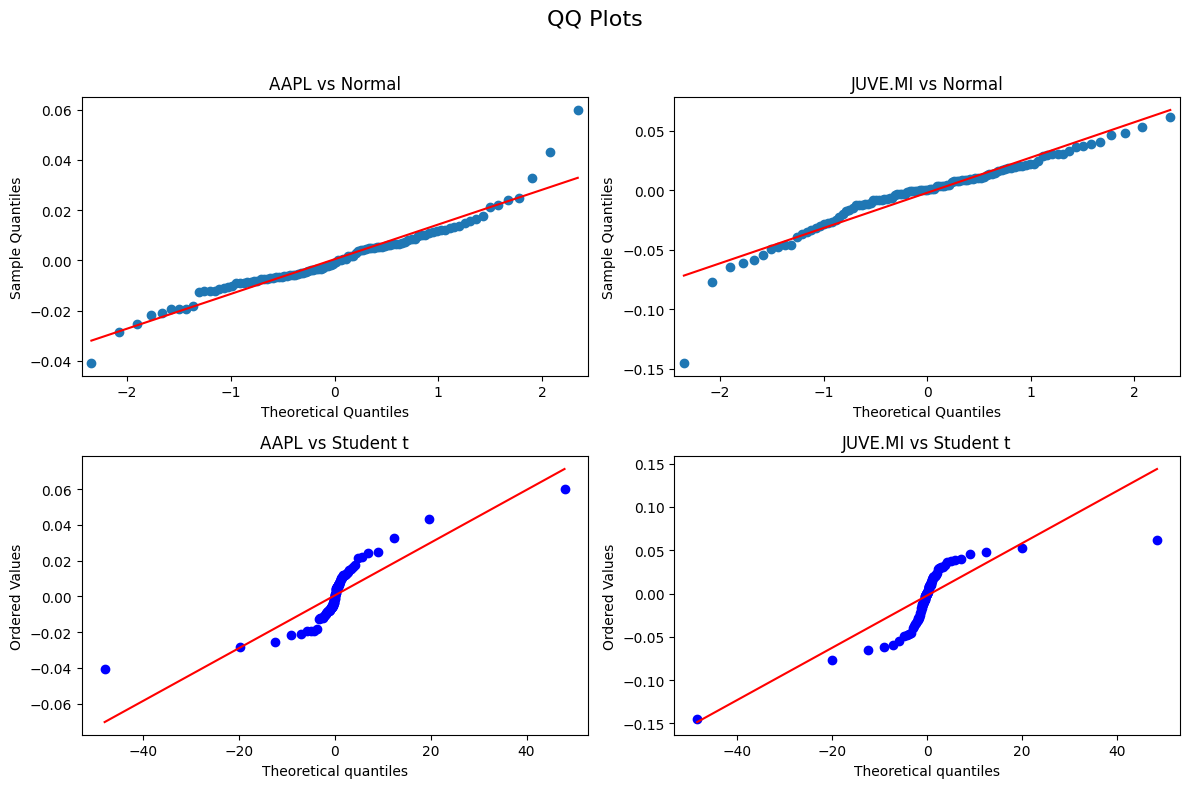

In [ ]:
from statsmodels.graphics.gofplots import qqplot

def plot_qq(data, title, ax, dist='normal'):
    if dist == 'normal':
        sm.qqplot(data, line='s', ax=ax)
    else:
        stats.probplot(data, dist="t", sparams=(degrees_of_freedom,), plot=ax)
    ax.set_title(title)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("QQ Plots", fontsize=16)
plot_qq(returns_AAPL, "AAPL vs Normal", axes[0, 0], dist='normal')
plot_qq(returns_JUVE, "JUVE.MI vs Normal", axes[0, 1], dist='normal')
degrees_of_freedom = 1
plot_qq(returns_AAPL, "AAPL vs Student t", axes[1, 0], dist='t')
plot_qq(returns_JUVE, "JUVE.MI vs Student t", axes[1, 1], dist='t')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


 ### ***DIFFERENCES BETWEEN NORMAL DISTRIBUTION AND STUDENT t DISTRIBUTION***

# **For the ECDF:**

**Normal Distribution**

The normal distribution typically underestimates extreme events (tails). For financial returns, the ECDF often shows heavier tails than the cumulative distribution of a fitted normal distribution. In the ECDF comparison, you'll notice that the empirical data diverges from the normal curve in the tails (too many extreme returns).

**Student's t-Distribution:**

The Student's t-distribution is more flexible, especially with low degrees of freedom , as it captures fat tails better. When using the ECDF, a properly fitted Student's t-distribution matches the tails of financial data more closely than the normal distribution. The match improves with heavier tails .

# **For the QQ plot:**

**Normal Distribution:**

Financial returns often deviate significantly from the straight line in the Q-Q plot's tails:

-The left tail (extreme losses) appears lower than the normal quantiles.

-The right tail (extreme gains) appears higher than the normal quantiles.

This is due to the kurtosis (fat tails) in real-world returns that **the** normal distribution cannot account for.

**Student's t-Distribution**

With an appropriate 𝜈 , the Student's t-distribution aligns much better with the empirical data in the Q-Q plot. The tails of the t-distribution adjust to the heavier tails observed in financial data, showing a better fit for extreme values. If 𝜈 is too high (close to normal), the t-distribution may not capture the tails well; if 𝜈 is too low, it might overfit the tails.

